<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG</h1></div>
<div><h2>Bài tập 03</h2></div>

**THÔNG TIN CÁ NHÂN**

- _Họ tên sinh viên:_ **Nguyễn Đặng Đăng Khoa**

- _Mã số sinh viên:_ **21120179**

**KHAI BÁO THƯ VIỆN**

In [1]:
import numpy as np
import pandas as pd
from numpy import random as nrd
import math
import time
from typing import Literal

import collections as clt
import statistics as sts
import scipy.stats as ssts

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **CÂU 1**
Dùng phương pháp **Monte Carlo**, ước lượng các giá trị sau với sai số chuẩn không quá $0.01$.

## **$\displaystyle I=\int_{-2}^{2}{e^{x+x^2}}{dx}$**

Nếu ta tính tích phân thông thường bằng toán học, ta có được giá trị tích phân như sau:

In [161]:
f_1_a = lambda x: np.exp(x + x**2)

def compute_integration(func=f_1_a, bin:int=100_000):
    # Tạo mảng miền giá trị x
    _x = np.linspace(-2, 2, bin)
    
    # Tính tích phân = giá trị trung bình * độ dài của khoảng [-2, 2], tức (= 4)
    _vec_func = np.vectorize(func)    
    _mean = np.mean(_vec_func(_x))
    _integral = np.multiply(_mean, (2 - (-2)))
    
    return _integral

# Số lượng bin
num_ = 1000000

# Tính tích phân
integral = compute_integration(bin=num_)
print("Tích phân:", integral)

Tích phân: 93.16348176810679


Sử dụng phương pháp Monte Carlo để ước tích phân trên:

Sinh $X_1, X_2, \dots, X_n \overset{\text{i.i.d}}{\sim} \mathcal{U}(-2,2)$, ta ước lượng $I$ như sau:

$$\displaystyle I=\int_{-2}^{2}{e^{x+x^2}}{dx}\approx\frac{2-(-2)}{n}\sum_{i=1}^{n}{e^{x+x^2}}=\frac{4}{n}\sum_{i=1}^{n}{e^{x+x^2}}$$

Hàm `estimate_monte_carlo_integration(num_samples, func)`:

Đầu vào:
- `num_samples`: Số lượng điểm mẫu ngẫu nhiên.
- `func`: Hàm số để ước tích phân.

Đầu ra:
- Ước tích phân gần đúng của hàm `func` trên khoảng [-2, 2].

Mã giả:

1. **Sinh điểm x ngẫu nhiên:** Sử dụng hàm `nrd.uniform` để tạo `num_samples` điểm `x` ngẫu nhiên trong khoảng [-2, 2].

2. **Tính giá trị trung bình của hàm số:**
    - Tính giá trị của hàm `func` tại mỗi điểm `x` và lưu trữ kết quả trong mảng `_vec_func`.
    - Tính giá trị trung bình của `_vec_func`.

3. **Ước tích phân:** Nhân giá trị trung bình `_mean` với độ dài của khoảng tích phân.

In [123]:
f_1_a = lambda x: np.exp(x + x**2)

def estimate_monte_carlo_integration(num_samples, func=f_1_a, return_std=False):
    # Sinh điểm x ngẫu nhiên trong khoảng từ -2 đến 2
    _x = nrd.uniform(-2, 2, num_samples)
    
    # Tính giá trị trung bình của hàm số tại các điểm ngẫu nhiên
    _vec_func = np.vectorize(func)    
    _mean = np.mean(_vec_func(_x))
    
    # Ước tích phân gần đúng = giá trị trung bình * độ dài của khoảng [-2, 2], tức (= 4)
    _integral_approximation = np.multiply(_mean, 4)
    
    if return_std == False:
        return _integral_approximation
    return _integral_approximation , np.std(_vec_func(_x), ddof=1)

In [74]:
estimate_monte_carlo_integration(10)

27.234731904783082

In [32]:
# Số lượng mẫu được lấy
num_samples = 50000000

# Tính phần tích phân gần đúng bằng phương pháp Monte Carlo
approximation, std = estimate_monte_carlo_integration(num_samples, return_std=True)
print("Ước tính tích phân gần đúng:", approximation)
print("Sai số chuẩn:", std/np.sqrt(num_samples))

Ước tính tích phân gần đúng: 93.10498041415177
Sai số chuẩn: 0.008617490875629099


Cỡ mẫu tối thiểu:

In [35]:
np.round(std**2/0.01**2, 0).astype(int)

37130574

Khoảng gần $40,000,000$ mẫu để có ước tích phân $I$ có sai số chuẩn không vượt qua $0.01$

## **$\displaystyle J=\int_{0}^{\infty}{\int_{0}^{x}{e^{-(x+y^2)}}{dy}}{dx}$**

# **CÂU 2**
Cho các $U_i(i \geq 1)$ độc lập và có phân phối $\mathcal{U}(0,1)$. Đặt:
$$\displaystyle N = \max\limits_{n}\left\{ \prod_{i=1}^n{U_i \geq e^{-3}} \right\}$$

Dùng phương pháp **Monte Carlo**:

`N_function(threshold, limits_N)`

Đầu vào:
    - `threshold`: Ngưỡng xác suất (mặc định: e^(-3))
    - `limits_N`: Giới hạn trên của `n` (mặc định: 1000)

Đầu ra:
    - Giá trị `n` lớn nhất sao cho tích lũy tích suất nhỏ hơn hoặc bằng `threshold`

Mã giả:

1. **Khởi tạo:**
    - Thiết lập `n_max` là 0.
    - Tạo mảng `u` chứa `n` giá trị ngẫu nhiên phân bố đều trong [0, 1].

2. **Lặp qua các giá trị `i` từ 1 đến `n`:**
    - Tính tích lũy tích suất `prod_u` của các phần tử trong `u` từ vị trí 0 đến vị trí `i - 1`.
    - So sánh `prod_u` với `threshold`:
        - Nếu `prod_u` lớn hơn hoặc bằng `threshold`:
            - Cập nhật `n_max` bằng `i`.
        - Không thực hiện hành động nào khác.

3. **Trả về kết quả:**
    - Trả về giá trị `n_max`.


In [191]:
def N_function(threshold:float=np.exp(-3), limits_N:int=1000):
    n = np.random.randint(1, 101)  # Lấy n ngẫu nhiên từ 1 đến 100
    u = np.random.uniform(0, 1, size=n)

    # Tính N
    n_max = 0
    for i in range(1, n + 1):
        if np.prod(u[:i]) >= threshold:
            n_max = i
    
    return n_max

Quan sát sự phân bổ lượng mẫu:

In [193]:
N_range = np.array([1, 10, 100, 1000, 10000, 100000])
result_N = np.array([])
mean_N = np.array([])
for N in N_range:
    res_N = [N_function() for _ in range(N)]
    result_N = np.append(result_N, res_N)
    mean_N = np.append(mean_N, np.mean(res_N))
    
# Convert type int of N_range to string
N_range_str = np.repeat([str(i) for i in N_range], N_range)

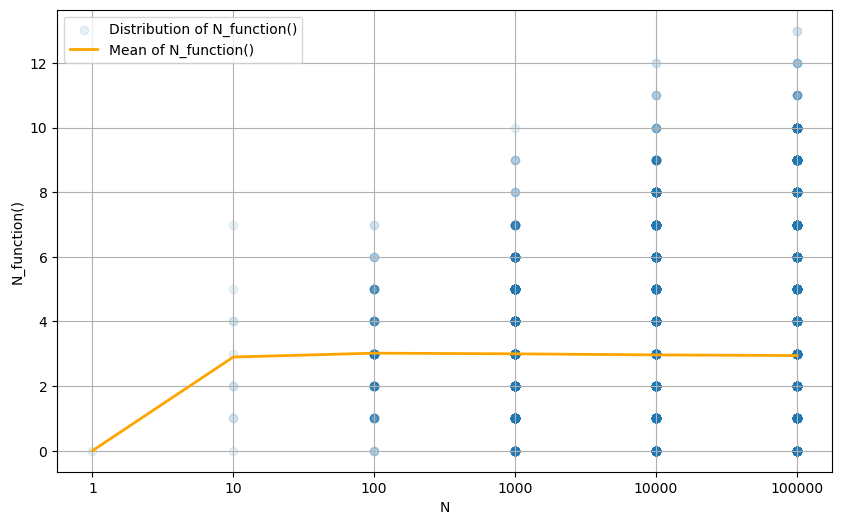

In [194]:
plt.figure(figsize=(10, 6))
plt.scatter(N_range_str, result_N, alpha=0.1, label="Distribution of N_function()")
plt.plot(list(sorted(set(N_range_str))), mean_N, color="orange", linewidth=2, label="Mean of N_function()")
plt.xlabel("N")
plt.ylabel("N_function()")
plt.legend()
plt.grid()

## **Ước lượng $P(N=1)$**

In [192]:
def estimate_probability_equal(N, num_samples, func=N_function, threshold:float=np.exp(-3)):
    _samples = [True if func(threshold) == N else False for _ in range(num_samples)]
    return np.mean(_samples)

estimate_probability_equal(1, 100000)

0.1563

## **Ước lượng $P(N\geq10)$**

In [196]:
def estimate_probability_greater(N, num_samples, func=N_function, threshold:float=np.exp(-3)):
    _samples = [True if func(threshold) >= N else False for _ in range(num_samples)]
    return np.mean(_samples)

estimate_probability_greater(10, 100000)

0.00105

## **Đưa ra khoảng tin cậy $95\%$ cho $E(N)$**

In [201]:
# Compute confidence interval
def compute_confidence_interval(confidence_level:float=0.95, func=N_function, threshold:float=np.exp(-3), num_samples=100000):
    _y = np.array([func(threshold) for _ in range(num_samples)])
    _z_MC = np.mean(_y)
    _alpha = 1 - confidence_level
    _q_alpha = ssts.norm.ppf(1 - _alpha / 2)
    _sigma = np.std(_y, ddof=1)
    return _z_MC + _q_alpha * _sigma / np.sqrt(num_samples) * np.array([-1, 1])

Khoảng tin cậy $95\%$ trên $100000$:

In [202]:
compute_confidence_interval()

array([2.95579773, 2.97708227])

# **CÂU 3**
Cho biến ngẫu nhiên có phân phối chuẩn tắc $X \sim \mathcal{N}(0,1)$. Ước lượng $P(3 \leq X \leq 4)$ bằng các phương pháp (1) Monte Carlo “ngây thơ” dùng phân phối $X \sim \mathcal{N}(0,1)$ và phương pháp lấy mẫu quan trọng với các phân phối mới lần lượt là (2) $Y \sim \mathcal{N}(1,1)$, (3) $Y \sim \mathcal{N}(2,1)$, (4) $Y \sim \mathcal{N}(3.5,1)$ và (5) $Y \sim \text{Exp}(1)+3$.

## **Ước lượng sai số của các phương pháp khi dùng cỡ mẫu là $50000$.**

In [108]:
N = 50_000

f_3 = lambda x: True if (3 <= x) & (x <= 4) else False
phi_3 = lambda x: 1.0/np.sqrt(2*np.pi) * np.exp(-x**2 / 2)

vec_f_3 = np.vectorize(f_3)
vec_phi_3 = np.vectorize(phi_3)

### **_Phương pháp 1: Monte Carlo_**

In [122]:
X = nrd.normal(0, 1, N)

y_3_1 = vec_f_3(X)

print('Ước lượng:', np.mean(y_3_1))
print('Ước lượng sai số:',  np.std(y_3_1, ddof=1)/N)

Ước lượng: 0.00134
Ước lượng sai số: 7.316368401395033e-07


### **_Phương pháp 2:_**

In [129]:
Y_3 = nrd.normal(1, 1, N)

psi_3_2 = lambda x: 1.0/np.sqrt(2*np.pi) * np.exp(-(x-1)**2 / 2)

vec_psi_3_2 = np.vectorize(psi_3_2)
y_3_2 = vec_f_3(Y_3)*vec_phi_3(Y_3)/vec_psi_3_2(Y_3)

print('Ước lượng:', np.mean(y_3_2))
print('Ước lượng sai số:',  np.std(y_3_2, ddof=1)/N)

0.0013671283375173277 0.009307955667435431
Ước lượng: 0.0013671283375173277
Ước lượng sai số: 1.8615911334870862e-07


### **_Phương pháp 3:_**

In [132]:
Y_3 = nrd.normal(2, 1, N)

psi_3_3 = lambda x: 1.0/np.sqrt(2*np.pi) * np.exp(-(x-2)**2 / 2)

vec_psi_3_3 = np.vectorize(psi_3_3)
y_3_3 = vec_f_3(Y_3)*vec_phi_3(Y_3)/vec_psi_3_3(Y_3)

print('Ước lượng:', np.mean(y_3_3))
print('Ước lượng sai số:', np.std(y_3_3, ddof=1)/N)

Ước lượng: 0.001336731665240259
Ước lượng sai số: 7.511431006722962e-08


### **_Phương pháp 4:_**

In [133]:
Y_3 = nrd.normal(3.5, 1, N)

psi_3_4 = lambda x: 1.0/np.sqrt(2*np.pi) * np.exp(-(x-2)**2 / 2)

vec_psi_3_4 = np.vectorize(psi_3_4)
y_3_4 = vec_f_3(Y_3)*vec_phi_3(Y_3)/vec_psi_3_4(Y_3)

print('Ước lượng:', np.mean(y_3_4))
print('Ước lượng sai số:', np.std(y_3_4, ddof=1)/N)

Ước lượng: 0.0029931133348185994
Ước lượng sai số: 9.327701026220038e-08


### **_Phương pháp 5:_**

In [135]:
Y_3 = nrd.exponential(1, N) + 3

psi_3_5 = lambda x: np.exp(-x) * np.exp(3)

vec_psi_3_5 = np.vectorize(psi_3_5)
y_3_5 = vec_f_3(Y_3)*vec_phi_3(Y_3)/vec_psi_3_5(Y_3)

print('Ước lượng:', np.mean(y_3_5))
print('Ước lượng sai số:', np.std(y_3_5, ddof=1)/N)

Ước lượng: 0.0013161224654002841
Ước lượng sai số: 2.765686077966276e-08


$\Longrightarrow$ Vậy phương pháp 5 là tốt nhất trong 5 phương pháp.

## **Dùng phương pháp tốt nhất trong các phương pháp trên tìm khoảng tin cậy $98\%$ cho $I$.**

In [21]:
N = 50_000
a_1_a = -2
b_1_a = 2
Y_3 = nrd.exponential(1, N) + 3

f_1_a = lambda x: np.exp(x + x**2)
phi_1_a = lambda x: (x - a_1_a)/(b_1_a - a_1_a)
psi_1_a = lambda x: np.exp(-x) * np.exp(3)

vec_f_1_a = np.vectorize(f_1_a)
vec_phi_1_a = np.vectorize(phi_1_a)
vec_psi_1_a = np.vectorize(psi_1_a)

func_3_b = lambda x: vec_f_1_a(x)*vec_phi_1_a(x)/vec_psi_1_a(x)
vec_f_3_b = np.vectorize(func_3_b)

In [22]:
# Compute confidence interval
def compute_confidence_interval(confidence_level:float=0.98, X=Y_3, func=vec_f_3_b):
    num_samples = len(X)
    _y = func(X)
    _z_MC = np.mean(_y)
    _alpha = 1 - confidence_level
    _q_alpha = ssts.norm.ppf(1 - _alpha / 2)
    _sigma = np.std(_y, ddof=1)
    return _z_MC + _q_alpha * _sigma / np.sqrt(num_samples) * np.array([-1, 1])

Khoảng tin cậy $98\%$ của $I$ trên $50,000$ mẫu:

In [23]:
compute_confidence_interval()

array([-9.88971870e+79,  2.48033179e+80])

Do phân phối của câu 1.a. không cùng phân phối của X trong phương pháp này, nên khoảng tin cậy $98\%$ nhưng vẫn có miền giá trị rộng.

# **CÂU 4**
Dùng 2 phương pháp giảm phương sai khác nhau để ước lượng giá trị $I$ ở Câu 1.a. Tính (hoặc ước lượng) tỉ lệ giảm phương sai so với phương pháp ở Câu 1.a.

$$\displaystyle I=\int_{-2}^{2}{e^{x+x^2}}{dx}$$

## **Phương pháp biến đổi kiểm soát**

Ta có tích phân có dạng tương tự với $I$:

$\begin{matrix}
K &=& \displaystyle \int_{-2}^{-\frac{1}{2}}{(2.9379x^2+2.9379x+1.5133)}{dx} + \int_{-\frac{1}{2}}^{2}{(64.424x^2+64.424x+16.8848)}{dx}\\
&=& \displaystyle 4.473375 + 337.48867\\
&=& 341.962045
\end{matrix}$

Với $f(x) = e^{x+x^2}$, $g(x) =
\begin{cases}
2.9379x^2+2.9379x+1.5133 & \qquad , x \in \left[-2; \displaystyle-\frac{1}{2}\right]\\
64.424x^2+64.424x+16.8848 & \qquad , x \in \left(\displaystyle-\frac{1}{2}, 2\right]\\
\end{cases}$, $X \sim \mathcal{U}(-2,2)$.

Ta có: $I=E(f(x))$, $K=E(g(x))$.

Sinh $X_1, X_2, \dots, X_n \overset{\text{i.i.d}}{\sim} \mathcal{U}(-2,2)$:

In [217]:
N = 100000

X = nrd.uniform(-2, 2,size=N)
f_X = np.exp(X+X**2) * 4
temp_g_X = lambda x: (2.9379 * x**2 + 2.9379 * x + 1.5133) if x <= -0.5 else (64.424 * x**2 + 64.424 * x + 16.8848)
g_X = np.vectorize(temp_g_X)(X) * 4
fg_X = f_X - g_X

Z_MC = np.mean(f_X)
Z_CV = np.mean(fg_X) + (341.962045)

print(f"Z_MC: {Z_MC:.4f}, Z_CV: {Z_CV:.4f}")
print(f"Estimated MSE ratio: {np.var(fg_X)/np.var(f_X):.4f}")

Z_MC: 92.5580, Z_CV: 94.7188
Estimated MSE ratio: 1.6009
